In [30]:
%load_ext autoreload
%autoreload 2

import os
from copy import deepcopy,copy

import numpy as np

import cv2
from matplotlib import pylab as plt

import tensorflow as tf
tf.python.control_flow_ops = tf

import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from utils import rgb2tensor,grey2rgb,preprocess_mnist,plot_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


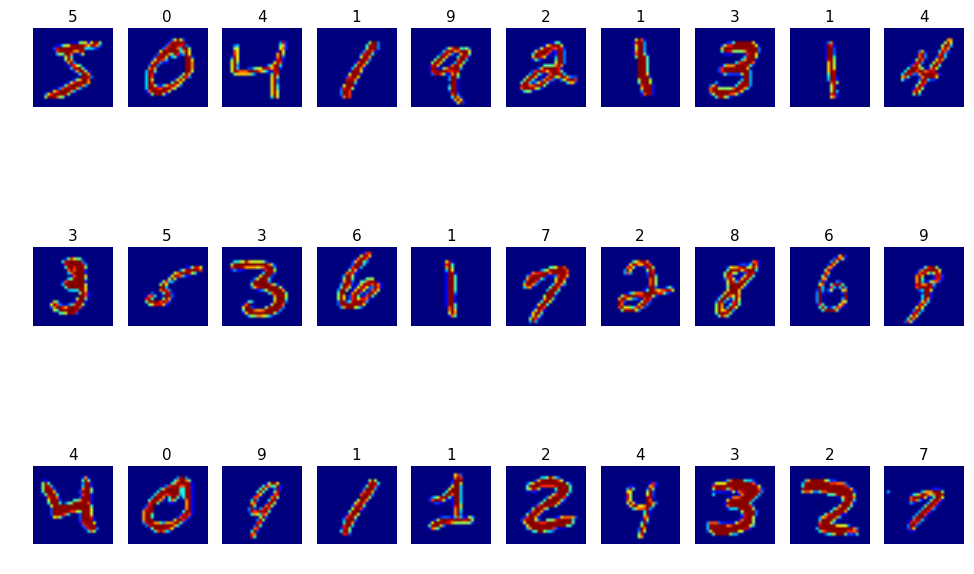

In [25]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

plot_list(img_list= X_train[:30],
          labels = y_train[:30],
          cols_nr=10,
          plot_config = None)

In [26]:
X_train = np.expand_dims(X_train,axis = 1).transpose(0,2,3,1)/255.
X_test = np.expand_dims(X_test,axis = 1).transpose(0,2,3,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
class PlotPredictionCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        predicted_labels = model.predict(X_test[:10])
        predicted_labels = np.argmax(predicted_labels,axis = 1)
        plot_list(img_list= X_test[:10,:,:,0],
                  labels = predicted_labels,
                  cols_nr=10,
                  plot_config = None)

In [46]:
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint,Callback

NB_CLASSES = 10
NB_EPOCHS = 20
BATCH_SIZE = 128
MODEL_PATH = os.path.join("models","nm8rs.h5")

inputs = Input(shape=(28,28,1))

x = Conv2D(16,3,3, activation='relu',border_mode="same",name='block1_conv')(inputs)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

x = Conv2D(64,3,3, activation='relu',border_mode="same",name='block2_conv')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Conv2D(128,3,3, activation='relu',border_mode="same",name='block3_conv')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

x = Flatten(name='flatten')(x)
x = Dense(256, activation='relu',name='fc1')(x)
x = Dropout(0.5)(x)

predictions = Dense(10, activation='softmax',name='predictions')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.2826 - acc: 0.9112

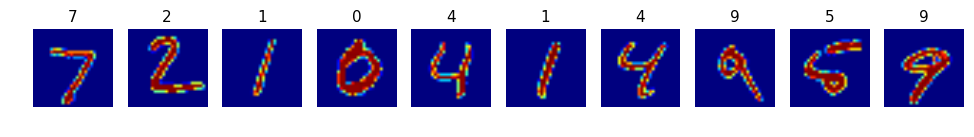

60000/60000 [==============================] - 82s - loss: 0.2823 - acc: 0.9113 - val_loss: 0.0501 - val_acc: 0.9840
Epoch 2/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0757 - acc: 0.9764

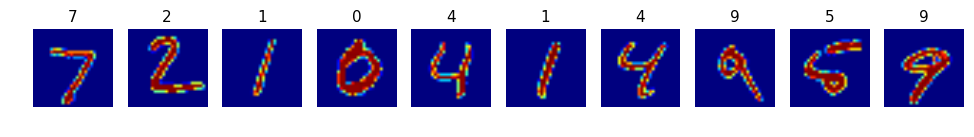

60000/60000 [==============================] - 86s - loss: 0.0758 - acc: 0.9763 - val_loss: 0.0535 - val_acc: 0.9819
Epoch 3/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0525 - acc: 0.9841

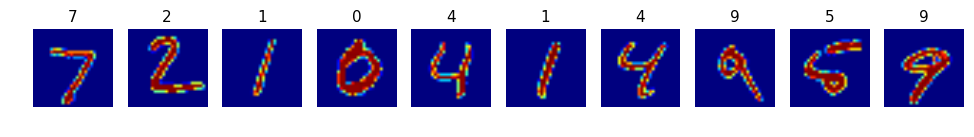

60000/60000 [==============================] - 105s - loss: 0.0524 - acc: 0.9841 - val_loss: 0.0265 - val_acc: 0.9907
Epoch 4/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0408 - acc: 0.9877

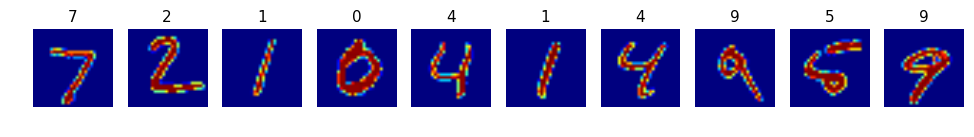

60000/60000 [==============================] - 141s - loss: 0.0408 - acc: 0.9877 - val_loss: 0.0235 - val_acc: 0.9920
Epoch 5/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0352 - acc: 0.9885

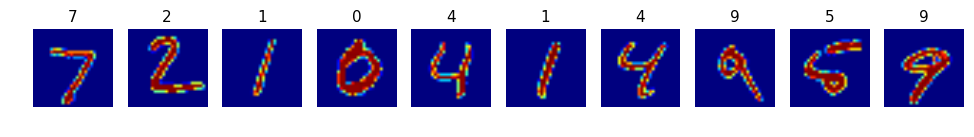

60000/60000 [==============================] - 86s - loss: 0.0352 - acc: 0.9886 - val_loss: 0.0238 - val_acc: 0.9925
Epoch 6/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0274 - acc: 0.9918

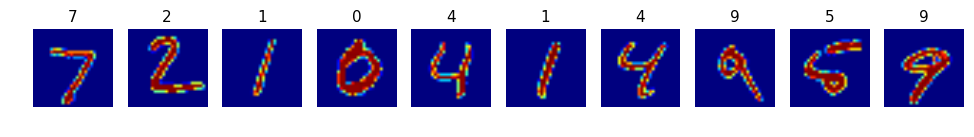

60000/60000 [==============================] - 90s - loss: 0.0275 - acc: 0.9918 - val_loss: 0.0267 - val_acc: 0.9910
Epoch 7/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0241 - acc: 0.9921

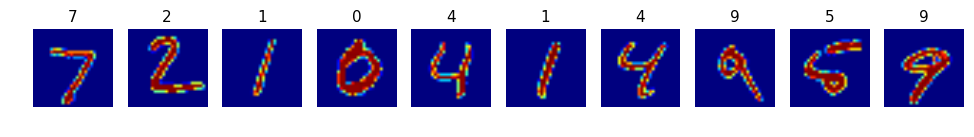

60000/60000 [==============================] - 97s - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0243 - val_acc: 0.9920
Epoch 8/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0213 - acc: 0.9931

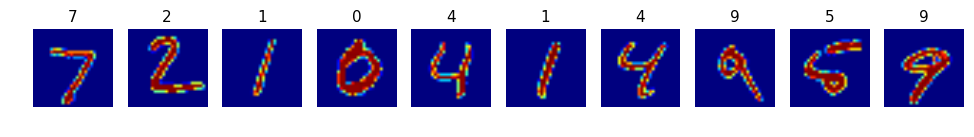

60000/60000 [==============================] - 89s - loss: 0.0214 - acc: 0.9931 - val_loss: 0.0230 - val_acc: 0.9926
Epoch 9/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0197 - acc: 0.9937

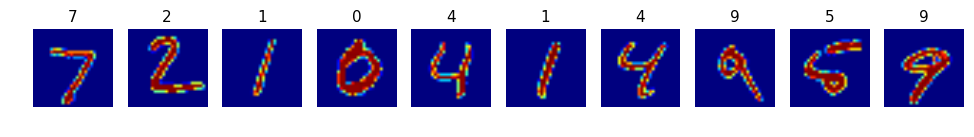

60000/60000 [==============================] - 86s - loss: 0.0197 - acc: 0.9938 - val_loss: 0.0222 - val_acc: 0.9920
Epoch 10/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0179 - acc: 0.9945

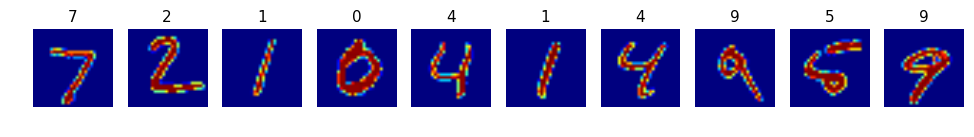

60000/60000 [==============================] - 85s - loss: 0.0179 - acc: 0.9945 - val_loss: 0.0225 - val_acc: 0.9928
Epoch 11/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0148 - acc: 0.9954

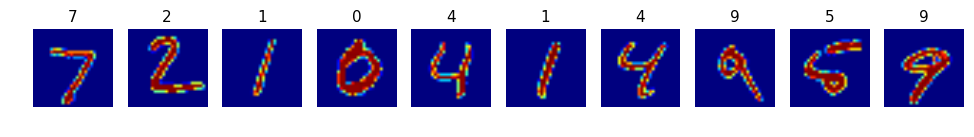

60000/60000 [==============================] - 86s - loss: 0.0148 - acc: 0.9954 - val_loss: 0.0272 - val_acc: 0.9919
Epoch 12/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0135 - acc: 0.9955

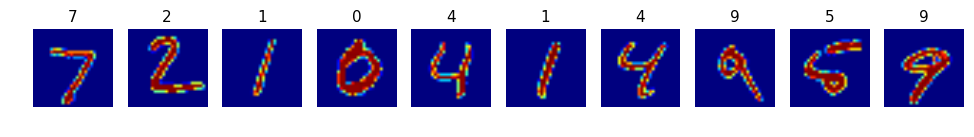

60000/60000 [==============================] - 90s - loss: 0.0135 - acc: 0.9955 - val_loss: 0.0281 - val_acc: 0.9922
Epoch 13/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9958

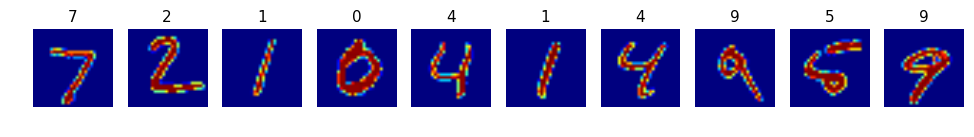

60000/60000 [==============================] - 82s - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0221 - val_acc: 0.9938
Epoch 14/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0112 - acc: 0.9959

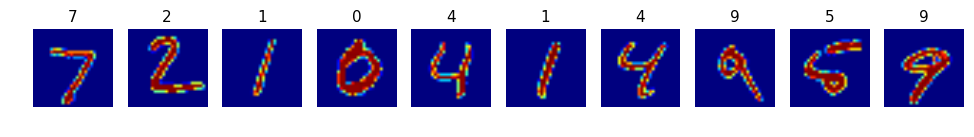

60000/60000 [==============================] - 84s - loss: 0.0112 - acc: 0.9959 - val_loss: 0.0268 - val_acc: 0.9928
Epoch 15/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0105 - acc: 0.9966

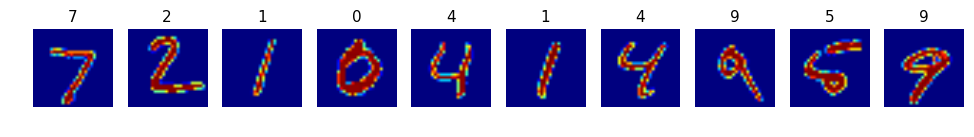

60000/60000 [==============================] - 83s - loss: 0.0105 - acc: 0.9966 - val_loss: 0.0286 - val_acc: 0.9930
Epoch 16/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0107 - acc: 0.9965

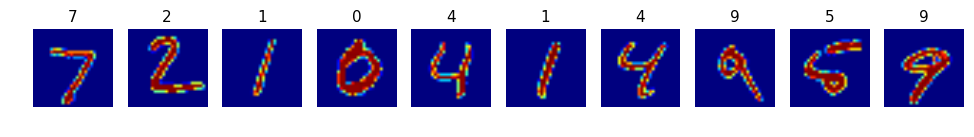

60000/60000 [==============================] - 102s - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0228 - val_acc: 0.9947
Epoch 17/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0082 - acc: 0.9972

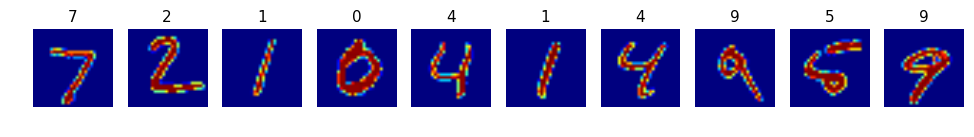

60000/60000 [==============================] - 105s - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0268 - val_acc: 0.9932
Epoch 18/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0082 - acc: 0.9975

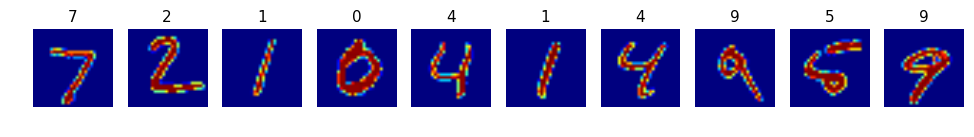

60000/60000 [==============================] - 85s - loss: 0.0082 - acc: 0.9975 - val_loss: 0.0322 - val_acc: 0.9928
Epoch 19/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 0.9967

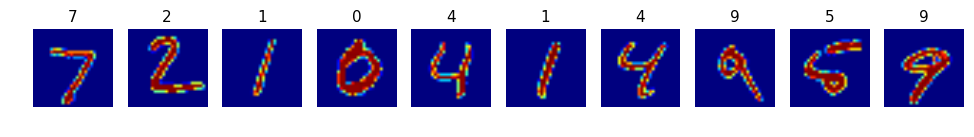

60000/60000 [==============================] - 87s - loss: 0.0089 - acc: 0.9967 - val_loss: 0.0307 - val_acc: 0.9922
Epoch 20/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0072 - acc: 0.9977

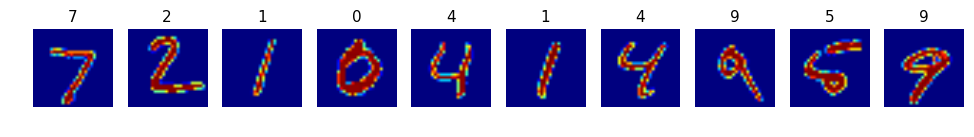

60000/60000 [==============================] - 109s - loss: 0.0072 - acc: 0.9977 - val_loss: 0.0326 - val_acc: 0.9928


In [47]:
plot_predictions = PlotPredictionCallback()
model_checkpoint = ModelCheckpoint(MODEL_PATH, monitor='val_loss', verbose=0, 
                                   save_best_only=True, save_weights_only=False, mode='auto')
model.fit(X_train,y_train, 
          validation_data = [X_test,y_test],
          nb_epoch = NB_EPOCHS,
          batch_size = BATCH_SIZE,
          verbose = 1,
          callbacks = [plot_predictions,model_checkpoint]) 

In [44]:
MODEL_NO_TOP_PATH = os.path.join("models","nm8rs_no_top.h5")

model_no_top = model

# drop top layers of the model
for _ in range(4):
    model_no_top.layers.pop()
    
for layer in model_no_top.layers:
    print layer.name
model_no_top.save_weights(MODEL_NO_TOP_PATH)

input_7
block1_conv
block1_pool
block2_conv
block2_pool
block3_conv
block3_pool
